In [5]:
%matplotlib inline

# LAB 6 - Forcing SHELL-E / NPZD2 with Oxygen Climatology and assessing the effect of eutrophication

MARI4600/BIO5600: Ecosystem Modelling for Aquaculture (Dalhousie University)

----------------------------------------

**Rendered link:** http://nbviewer.jupyter.org/urls/bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week5/LAB%205%20Coupling%20SHELL-E%20to%20a%20NPZD2%20plankton%20model.ipynb

--------------------------------------



### Setup of workspace

<span class="important"></span> Make sure all required files are in the working directory:

* Create a **folder** on the "Desktop" and name it <span class='file'>Lab</span>
* From Brightspace, download the following files into your new folder <span class='file'>Desktop\Lab</span>:
   * <span class='file'>model_NPZD2.py</span>
   * <span class='file'>model_SHELLE.py</span> <span class="important"></span> Brightspace automatically renamed the file as <span class='file'>model_SHELLE1.py</span>. After you downloaded the file, change the name back to <span class='file'>model_SHELLE.py</span>
* In Spyder, change the "working directory" to: <span class='file'>Desktop\Lab</span>. Note that to change the "working directory", click on "folder icon" on top-right corner.

----------------------------------


Model run: DONE!!!


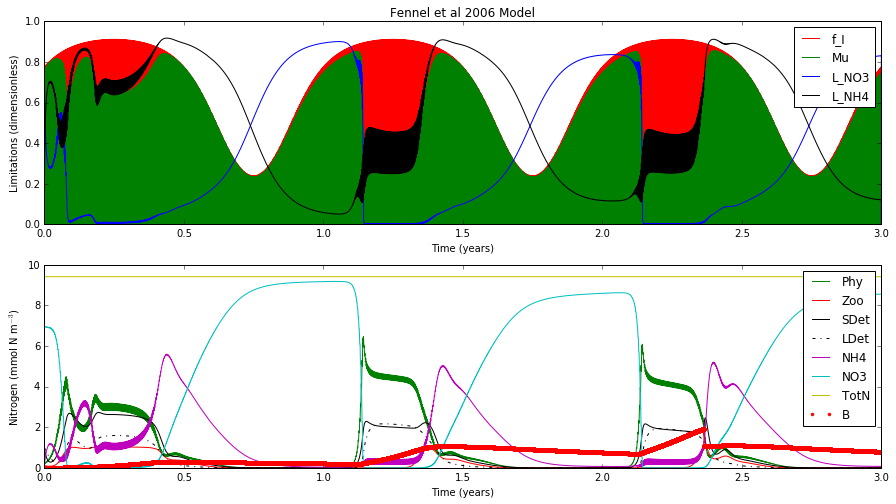

In [39]:
#%% Original model_NPZD2_SHELLE
import model_NPZD2_SHELLE as model
reload(model)

days, dt, par, InitCond = model.load_defaults()
output = model.run(days,dt,InitCond,par)
model.plot(output)

In [ ]:
        if Gonad[t+1] < 0:# If negative Gonad, take the biomass from Soma instead
            Soma[t+1] = Soma[t+1] + Gonad[t+1]
            Gonad[t+1] = 0. 

In [ ]:
    output['Oxy'] = Oxy
    output['L_Temp'] = L_Temp 
    output['L_Salt'] = L_Salt 
    output['L_Oxy'] = L_Oxy
    output['L_Food'] = L_Food 

In [ ]:
    # Plankton NPZD2 ecosystem
    fig1, ax1 = plt.subplots(1,1,figsize=(15, 4))
    ax1.plot(output['time']/365,output['f_I'],'r-')
    ax1.plot(output['time']/365,output['mu'],'g-')
    ax1.plot(output['time']/365,output['L_NO3'],'b-')
    ax1.plot(output['time']/365,output['L_NH4'],'k-')
    ax1.set_xlabel('Time (years)')
    ax1.set_ylabel('Limitations (dimensionless)')
    ax1.set_title('PANEL 1: Fennel et al 2006 Model - Limitations')
    ax1.legend(['f_I','Mu','L_NO3','L_NH4'])
    plt.show()
    
    fig2, ax2 = plt.subplots(1,1,figsize=(15, 4))
    ax2.plot(output['time']/365,output['Phy'],'g-')
    ax2.plot(output['time']/365,output['Zoo'],'r-')
    ax2.plot(output['time']/365,output['SDet'],'k-')
    ax2.plot(output['time']/365,output['LDet'],'k-.')
    ax2.plot(output['time']/365,output['NH4'],'m-')
    ax2.plot(output['time']/365,output['NO3'],'c-')
    ax2.set_xlabel('Time (years)')
    ax2.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
    ax2.set_title('PANEL 2: Fennel et al 2006 Model - State')
    plt.legend(['Phy','Zoo','SDet','LDet','NH4','NO3'])
    plt.show()
    
    fig3, ax3 = plt.subplots(1,1,figsize=(15, 4))
    ax3.plot(output['time']/365,output['Oxy'],'b-')
    ax3.set_xlabel('Time (years)')
    ax3.set_ylabel('Oxygen (mmol O$_2$ m$^{-3}$)')
    ax3.set_title('PANEL 3: Fennel et al 2006 Model - State - Oxygen')
    plt.legend(['Oxy'])
    plt.show()
    
    # Mussels - SHELL-E ecosystem
    fig4, ax4 = plt.subplots(1,1,figsize=(15, 4))
    ax4.plot(output['time']/365,output['L_Temp'],'r-') 
    ax4.plot(output['time']/365,output['L_Salt'],'c-') 
    ax4.plot(output['time']/365,output['L_Oxy'],'b')
    ax4.plot(output['time']/365,output['L_Food'],'b')
    ax4.set_ylabel('Limitations (dimensionless)')
    ax4.set_xlabel('Time (years)') 
    ax4.set_title('PANEL 4: SHELL-E Model - Limitations')
    ax4.legend(['L_Temp', 'L_Salt', 'L_Oxy','L_Food'])
    plt.show()

    fig5, ax5 = plt.subplots(1,1,figsize=(15, 4))
    ax5.plot(output['time']/365,output['B'],'r-') 
    ax5.plot(output['time']/365,output['Soma'],'b-') 
    ax5.plot(output['time']/365,output['Gonad'],'g.')
    ax5.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
    ax5.set_xlabel('Time (years)')
    ax5.set_title('PANEL 5: SHELL-E Model - State')
    ax5.legend(['B', 'Soma', 'Gonad'])
    plt.show()
    
    # Total Nitrogen
    fig6, ax6 = plt.subplots(1,1,figsize=(15, 4))
    ax6.plot(output['time']/365,output['TotN'],'y.') 
    ax6.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
    ax6.set_xlabel('Time (years)')
    ax6.set_title('PANEL 6: Total Nitrogen')
    ax6.legend(['TotN'])
    plt.show()

Model run: DONE!!!


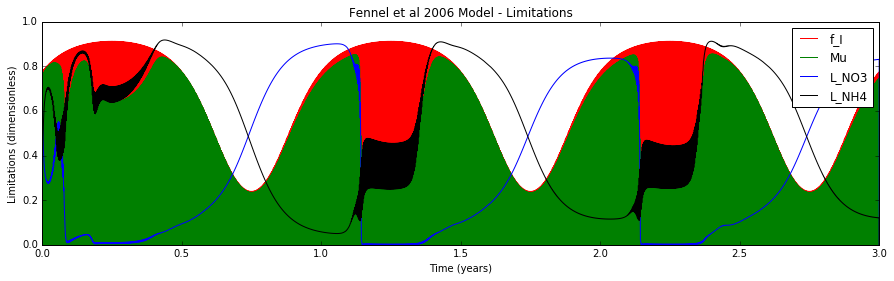

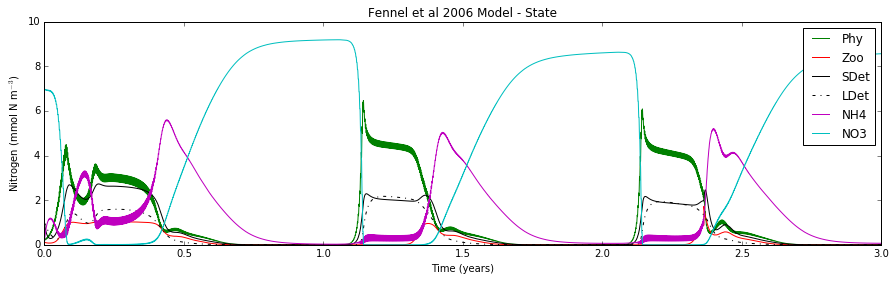

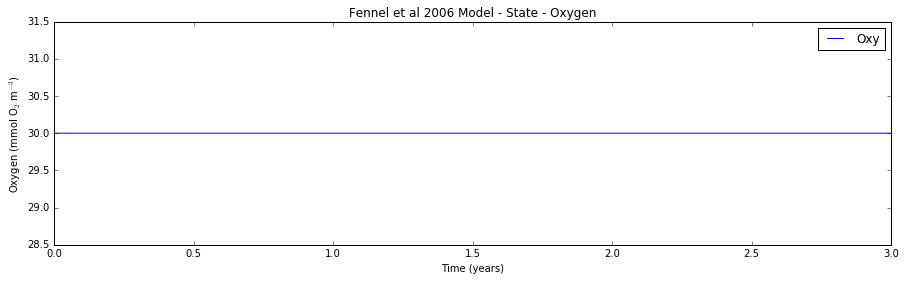

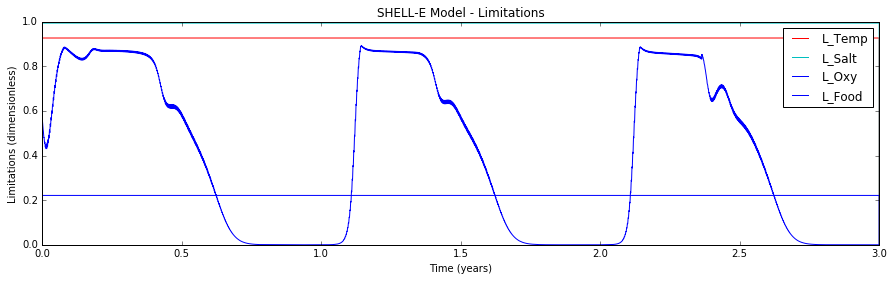

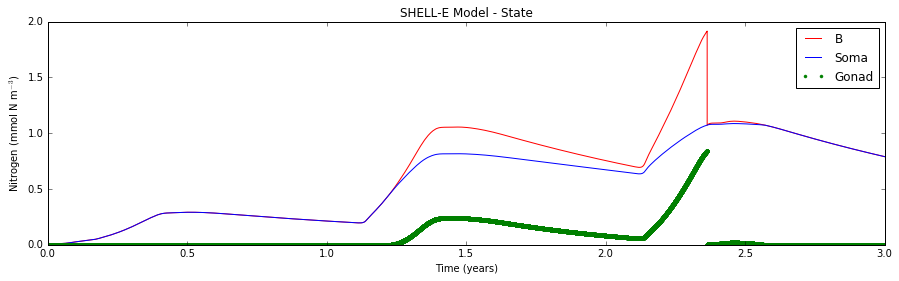

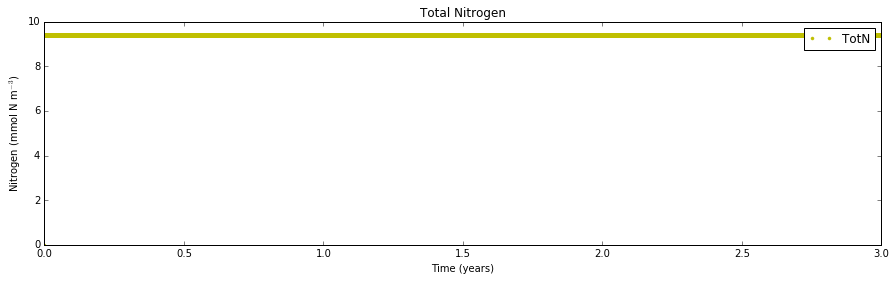

In [41]:
#%% IMPROVED model_NPZD2_SHELLE
import model_NPZD2_SHELLE_2 as model
reload(model)

days, dt, par, InitCond = model.load_defaults()
output = model.run(days,dt,InitCond,par)
model.plot(output)

In [ ]:
    # Physical characteristics of embayment
    par['X'] = 1. # Basin length
    par['Y'] = 1. # Basin width
    par['Z'] = 1. # Basin depth
    par['V'] = par['X'] * par['Y'] * par['Z']

In [ ]:
    InitCond['n_muss'] = 1.

In [ ]:
    n_muss = np.zeros((NoSTEPS,),float) # same as above
    B_total = np.zeros((NoSTEPS,),float) # Total Biomass of mussels in Embayment 

In [ ]:
    n_muss[0] = InitCond['n_muss']
    B_total[0] = B[0] * n_muss[0] / par['V']

In [ ]:
        # Estimate Total Nitrogen
        TotN[t+1] = Phy[t+1] + Zoo[t+1] + SDet[t+1] + LDet[t+1] + NH4[t+1] + NO3[t+1] + ((B[t+1]*n_muss[t+1])/par['V'])

In [ ]:
        # Spawning
        if Gonad[t]/B[t] < par['GT']:
            Spawning[t] = 0.
            dGonaddt = (A[t]-R[t]) * RE[t]
            dSomadt =  (A[t]-R[t]) * (1.-RE[t])
        elif Gonad[t]/B[t] >= par['GT']:         
            Spawning[t] = Gonad[t]
            dGonaddt = 0.
            dSomadt = A[t]-R[t]
            Zoo[t] =  Zoo[t] + ((Spawning[t]*n_muss[t])/par['V']) # Spawning biomass becomes zooplankton
        else:
            dGonaddt = 0.
            dSomadt = 0.  

In [ ]:
        dLDetdt = dLDetdt + (Fae*(n_muss[t]/par['V'])) 

In [ ]:
        dPhydt =  dPhydt-((F[t] *par['epsilonP']*Phy[t])*(n_muss[t]/par['V']))
        dZoodt =  dZoodt-((F[t] *par['epsilonZ']*Zoo[t])*(n_muss[t]/par['V']))
        dSDetdt = dSDetdt -((F[t] *par['epsilonD']*SDet[t])*(n_muss[t]/par['V']))

In [ ]:
        dNH4dt = dNH4dt + (R[t]*n_muss[t]/par['V'])

In [ ]:
        # Population dynamics of mussels
        dn_mussdt = 0

In [ ]:
        B_total[t+1] =  B[t+1] * n_muss[t+1] / par['V']
        n_muss[t+1] = n_muss[t] + (dn_mussdt * dt)    

In [ ]:
    output['B_total'] = B_total
    output['n_muss'] = n_muss

Model run: DONE!!!


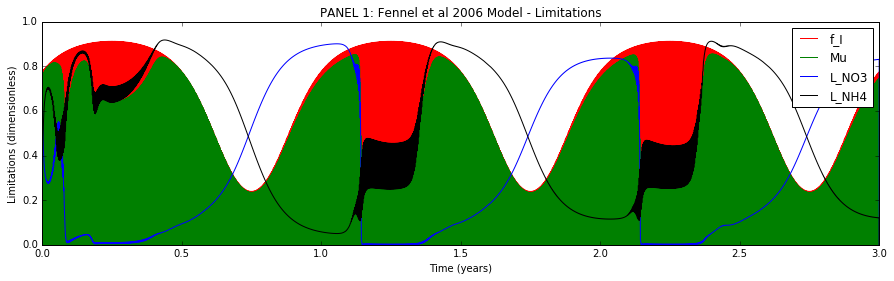

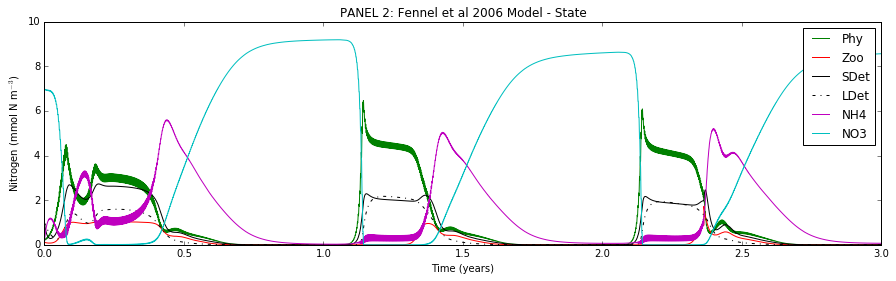

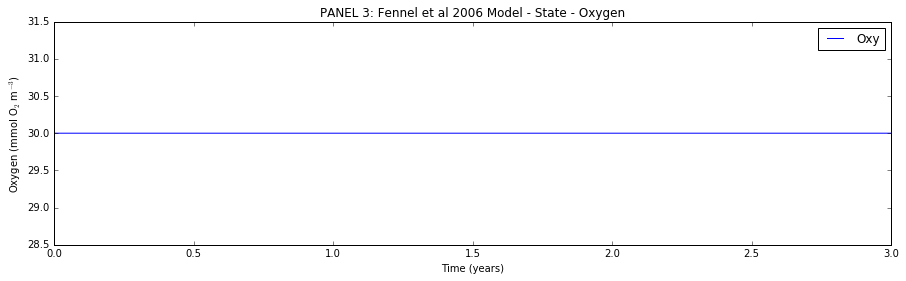

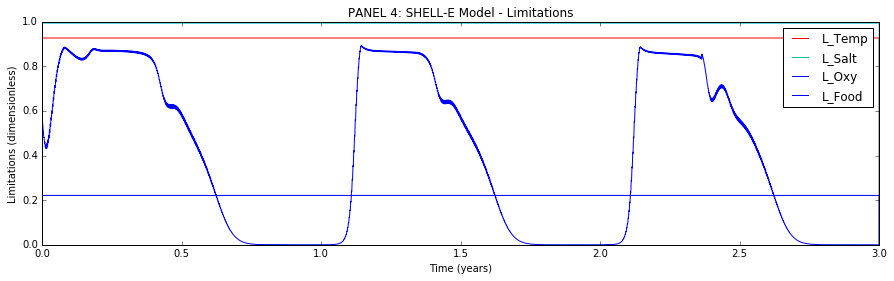

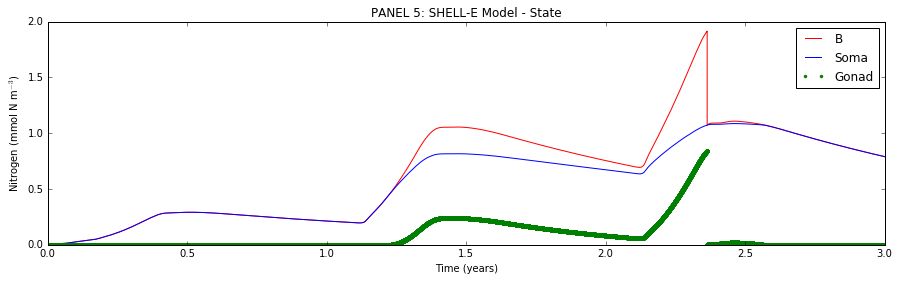

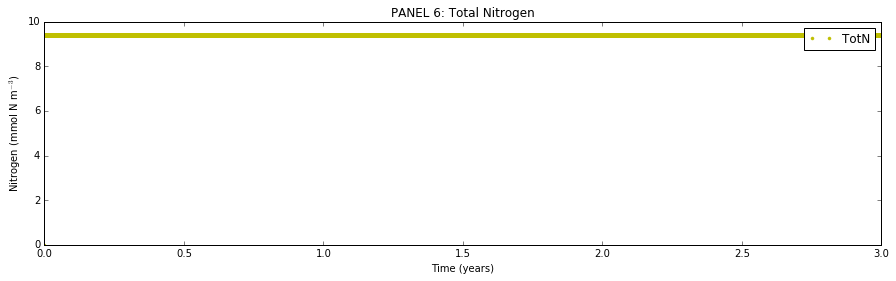

In [46]:
#%% IMPROVED model_NPZD2_SHELLE
import model_NPZD2_SHELLE_embayment as model
reload(model)

days, dt, par, InitCond = model.load_defaults()
output = model.run(days,dt,InitCond,par)
model.plot(output)

Model run: DONE!!!
Model run: DONE!!!


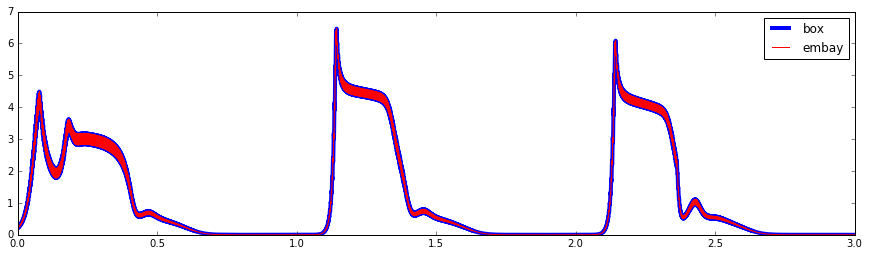

In [47]:
import model_NPZD2_SHELLE as model
reload(model)

days, dt, par, InitCond = model.load_defaults()
box = model.run(days,dt,InitCond,par)

import model_NPZD2_SHELLE_embayment as model
reload(model)

days, dt, par, InitCond = model.load_defaults()
embay = model.run(days,dt,InitCond,par)


import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1,figsize=(15, 4))
ax.plot(box['time']/365,box['Phy'],'b-',linewidth='4')
ax.plot(embay['time']/365,embay['Phy'],'r-')
plt.legend(['box','embay'])


Model run: DONE!!!


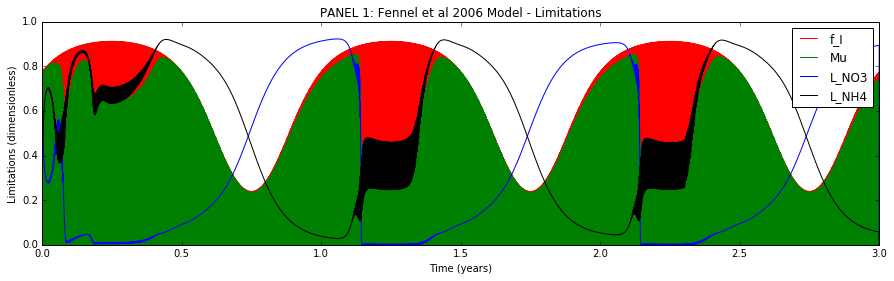

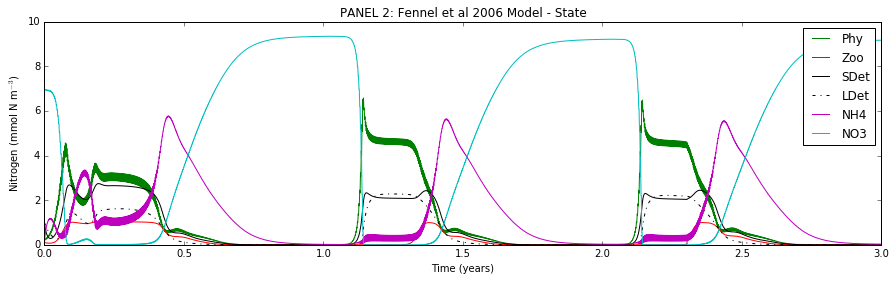

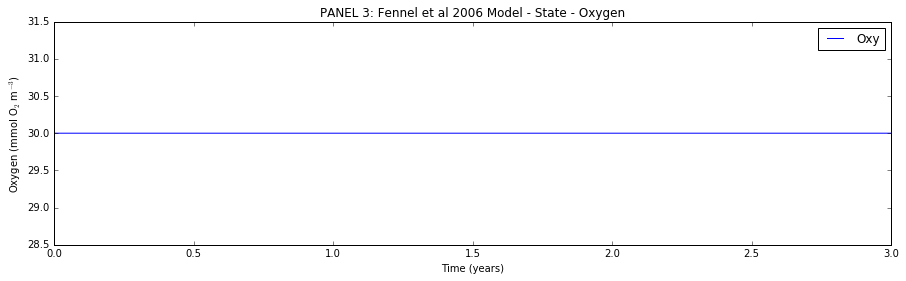

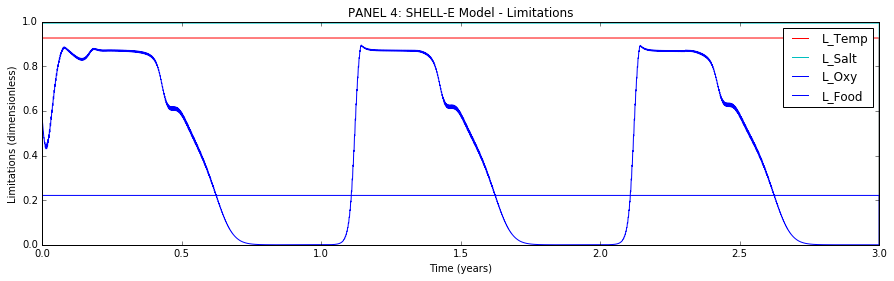

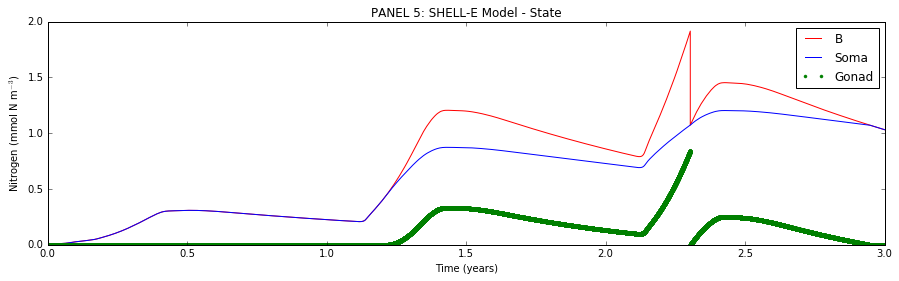

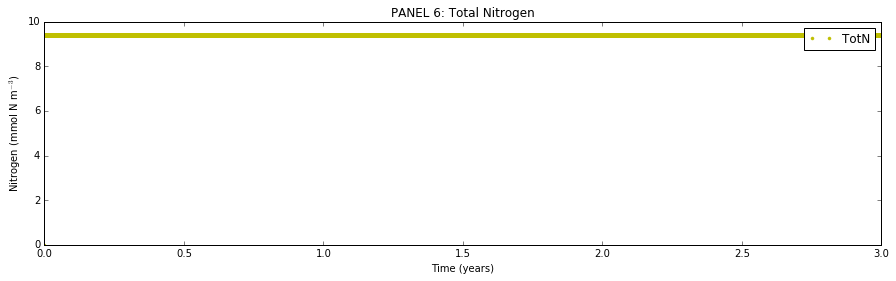

In [65]:
import model_NPZD2_SHELLE_embayment as model
reload(model)

days, dt, par, InitCond = model.load_defaults()

par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']

InitCond['n_muss'] = 400000. # number of mussels in basin    
    
output = model.run(days,dt,InitCond,par)
model.plot(output)

In [54]:
par['V']

1.0

In [ ]:
        # Oxygen sub-model =========================================
        
        # Parameters
        OA0 = 2.00907       # Oxygen
        OA1 = 3.22014       # saturation
        OA2 = 4.05010       # coefficients
        OA3 = 4.94457
        OA4 =-0.256847
        OA5 = 3.88767
        OB0 =-0.00624523
        OB1 =-0.00737614
        OB2 =-0.0103410
        OB3 =-0.00817083
        OC0 =-0.000000488682
        rOxNO3= 8.625       # 138/16
        rOxNH4= 6.625       # 106/16
        l2mol = 1000.0/22.9316 # liter to mol
        
        #-----------------------------------------------------------------------
        #  Surface O2 gas exchange.
        #-----------------------------------------------------------------------
        
        #  Compute surface O2 gas exchange.
        cff2=0.31*(24.0/100.0)
        
        #  Compute O2 transfer velocity : u10squared (u10 in m/s)
        u10squ=(par['uwind']*par['uwind'])+(par['vwind']*par['vwind'])
        
        # Calculate the Schmidt number for O2 in sea water (Wanninkhof, 1992).
        SchmidtN_Ox=1953.4-Temp[t]*(128.0-Temp[t]*(3.9918-Temp[t]*0.050091))
        cff3=cff2*u10squ*np.sqrt(660.0/SchmidtN_Ox)        
        
        #  Calculate O2 saturation concentration using Garcia and Gordon
        #  L&O (1992) formula, (EXP(AA) is in ml/l).        
        TS=np.log((298.15-Temp[t])/(273.15+Temp[t]))        
        
        AA=OA0+TS*(OA1+TS*(OA2+TS*(OA3+TS*(OA4+TS*OA5))))+ \
           Salt[t]*(OB0+TS*(OB1+TS*(OB2+TS*OB3)))+ \
           OC0*Salt[t]*Salt[t]
        
        # Convert from ml/l to mmol/m3.
        O2satu=l2mol*np.exp(AA)        
        
        # Add in O2 gas exchange.
        O2_Flux = cff3*(O2satu-Oxy[t])
        
        airwater_O2_flux[t] = O2_Flux * (1./par['Z'])
        
        dOxydt = airwater_O2_flux[t]
        
        
        # Production via Photosynthesys
        dOxydt = dOxydt + (muMax * f_I[t] * L_NO3[t] * Phy[t] * rOxNO3) # New production
        dOxydt = dOxydt + (muMax * f_I[t] * L_NH4[t] * Phy[t] * rOxNH4) # Regenerated production
        
        # Respiration
        dOxydt = dOxydt - (((par['lBM']*Zoo[t]) - \
                           (par['lE']*((Phy[t]**2)/(par['kP']+(Phy[t]**2)))*par['beta']*Zoo[t]) - \
                           (par['mZ']*(Zoo[t]**2))) * rOxNH4) # Zooplankton
 
        dOxydt = dOxydt - ((n * n_O2 * NH4[t])* rOxNH4 * 2) # Nitrification 
 
        dOxydt = dOxydt - (((par['rSD']*SDet[t])+(par['rLD']*LDet[t])) * rOxNH4) #S and L Detritus remineralization
        
        dOxydt = dOxydt - (((R[t]*n_muss[t])/par['V']) * rOxNH4)  #Respiration by mussels

In [ ]:
    # Other physical parameters (for Oxygen exchange with Atmosphere)
    par['uwind'] = 0.5
    par['vwind'] = 0.5

In [ ]:
    airwater_O2_flux = np.zeros((NoSTEPS,),float) # same as above

After `n = par['nmax'] * (1 - max(0,(I[t]-par['I0'])/(par['kI']+I[t]-par['I0'])))`

In [ ]:
        n_O2 = (Oxy[t]/(3.+Oxy[t]))

In [ ]:
        dNO3dt = -(muMax * f_I[t] * L_NO3[t] * Phy[t]) + \
                  (n * n_O2 * NH4[t])
                 
        dNH4dt = -(muMax * f_I[t] * L_NH4[t] * Phy[t]) - \
                  (n * n_O2 * NH4[t]) + \
                  (par['lBM'] * Zoo[t]) + \
                  (par['lE']*((Phy[t]**2)/(par['kP']+(Phy[t]**2)))*par['beta']*Zoo[t]) + \
                  (par['rSD']*SDet[t]) + \
                  (par['rLD']*LDet[t])

In [ ]:
        Oxy[t+1]  = max(0,Oxy[t] +  (dOxydt * dt))

In [ ]:
    output['Oxy'] = Oxy
    output['L_Oxy'] = L_Oxy

Model run: DONE!!!


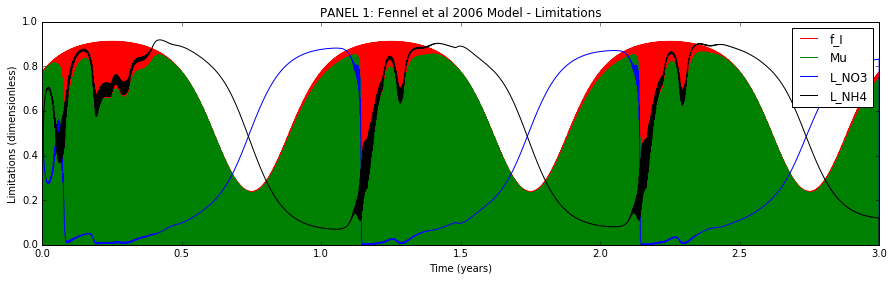

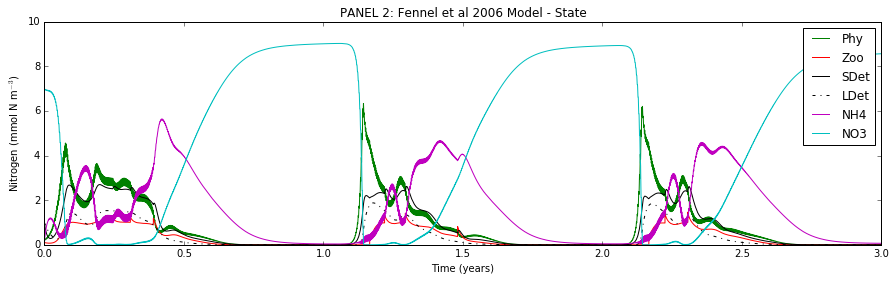

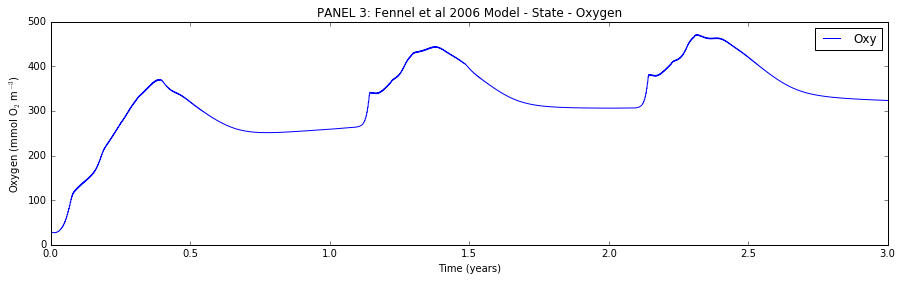

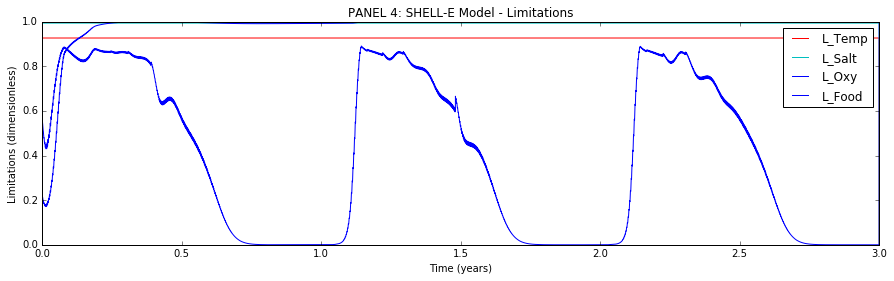

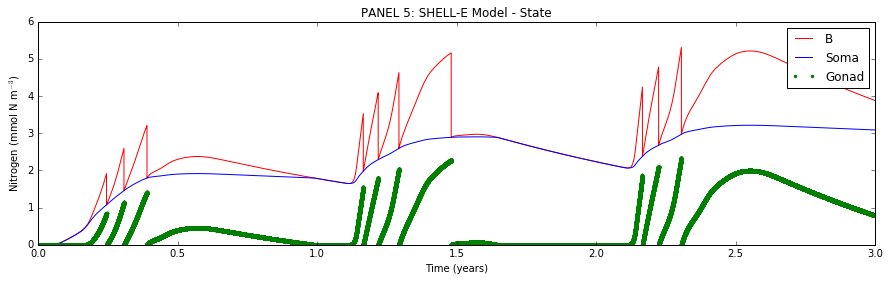

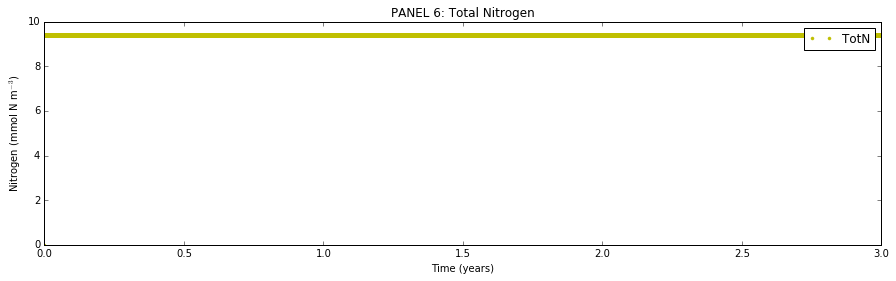

In [66]:
import model_NPZD2_SHELLE_embayment_O2 as model
reload(model)

days, dt, par, InitCond = model.load_defaults()

par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']

InitCond['n_muss'] = 400000. # number of mussels in basin    
    
output = model.run(days,dt,InitCond,par)
model.plot(output)

Model run: DONE!!!


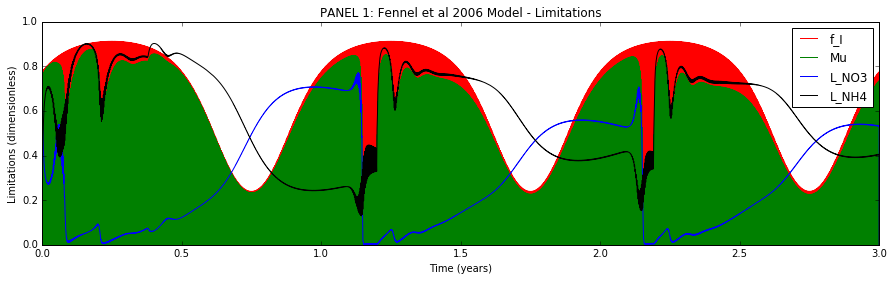

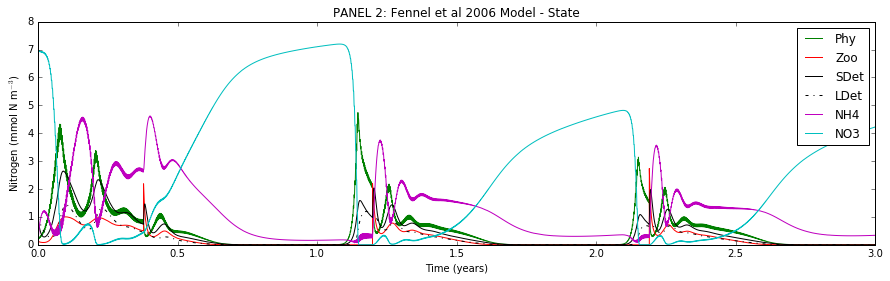

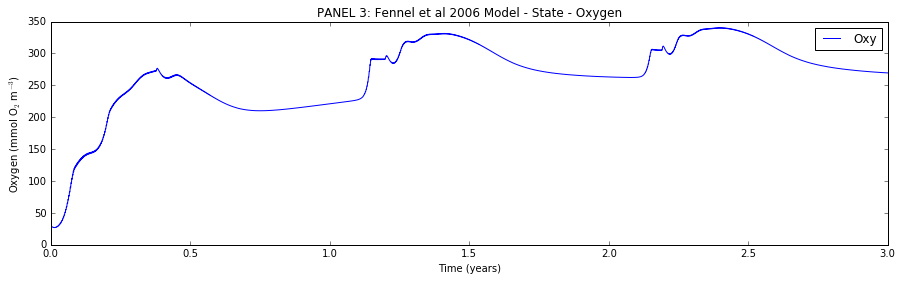

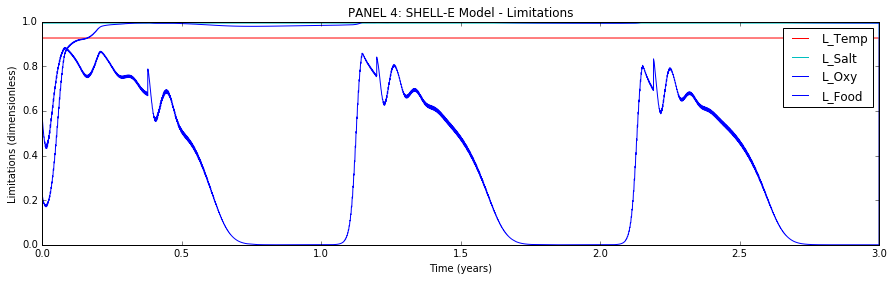

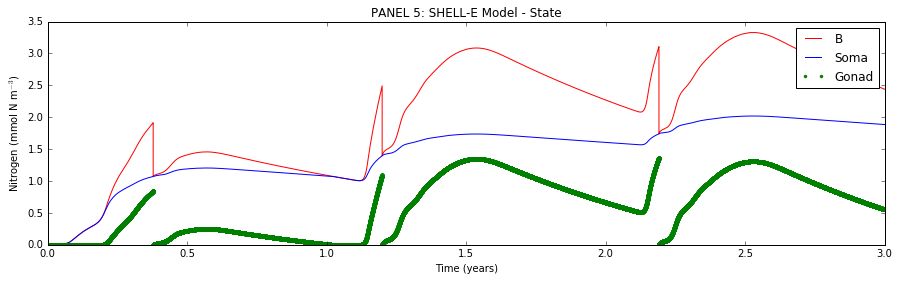

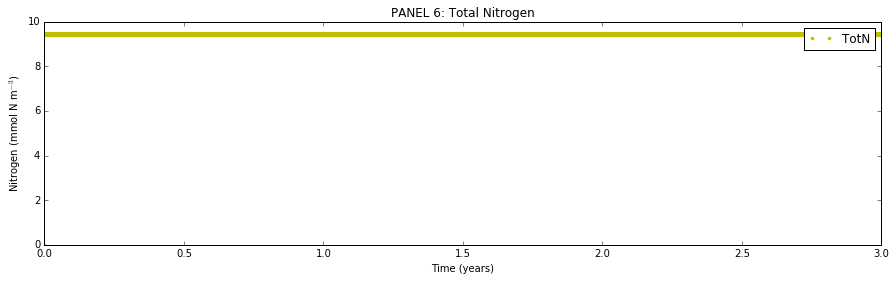

In [68]:
import model_NPZD2_SHELLE_embayment_O2 as model
reload(model)

days, dt, par, InitCond = model.load_defaults()

par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']

InitCond['n_muss'] = 4 * 10**6. # number of mussels in basin    
    
output = model.run(days,dt,InitCond,par)
model.plot(output)

_Please beware that this model was designed as a teaching tool and may not be adequate to represent realistic applications_.

# **This is the end of lab**

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [1]:
# Loads css file and applies it to lab HTML
from IPython.core.display import HTML
def css():
    style = open("../css/custom.css", "r").read()
    return HTML(style)
css()